# Symbol Counting and Distribution

For each problem, we have a list which stores the symbols of each clause as a set.
Each problem is stored as a dict entry

In [1]:
import re
import glob
from pathlib import Path
import numpy as np
from collections import Counter
import seaborn as sns
from itertools import chain

In [2]:
SYMBOL_RE = b"\w\w*\("

def read_problem(problem_path):
    
    with open(problem_path, 'rb') as f:
        problem = f.readlines()
    return problem

def get_problem_symbols(problem):
    symbols = []
    for formula in problem:
        # Get all symbols but remove the fof definition
        res = re.findall(SYMBOL_RE, formula)[1:]
        # Remove trailing parenthasis
        res = set(r[:-1] for r in res)
        symbols.append(res)
    return symbols

# Load symbols

In [3]:
paths = glob.glob('/home/eholden/gnn-entailment-caption/nndata/*')
len(paths)

32532

In [4]:
%time
d = {}
for path in paths:
    problem = read_problem(path)
    if "example_" not in path:
        d[Path(path).stem] = get_problem_symbols(problem)

CPU times: user 1 µs, sys: 1e+03 ns, total: 2 µs
Wall time: 3.1 µs


##  Problem stats


Average number of clauses per problem 17.07
Histogram of number of clauses per problem


<AxesSubplot:ylabel='Count'>

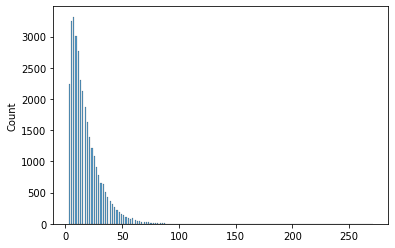

In [5]:

no_formulae = [len(f) for f in d.values()]
print(f"Average number of clauses per problem {np.average(no_formulae):0.2f}")
print("Histogram of number of clauses per problem")
sns.histplot(no_formulae)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 7.63 µs
Number of unqiue symbols: 12506
Average number of unique symbols per problem: 24.85
Histogram of number of unique symbols per problem


<AxesSubplot:ylabel='Count'>

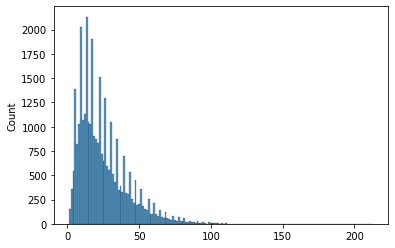

In [6]:
%time
uq_symb = []
for problem in d.values():
    f = set()
    for formula in problem:
        f.update(formula)
    uq_symb.append(f)
    
print(f"Number of unqiue symbols: {len(set(chain(*uq_symb)))}")
print(f"Average number of unique symbols per problem: {np.average([len(symb) for symb in uq_symb]):0.2f}")
print("Histogram of number of unique symbols per problem")
sns.histplot([len(symb) for symb in uq_symb])

## Clause stats


CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 µs
Wall time: 3.1 µs
Average number of symbols per clause 7.09


<AxesSubplot:ylabel='Count'>

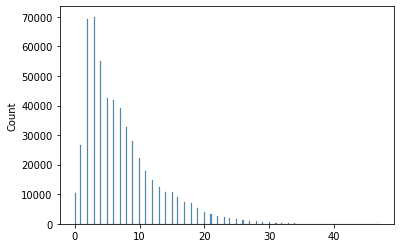

In [7]:
%time
no_symbol_clause = []
for problem in d.values():
    no_symbol_clause.extend([len(f) for f in problem])
    
print(f"Average number of symbols per clause {np.average(no_symbol_clause):.2f}")
sns.histplot(no_symbol_clause)

# Ratio of unique symbols to clauses in a problem

Average ratio: 1.76


<AxesSubplot:ylabel='Count'>

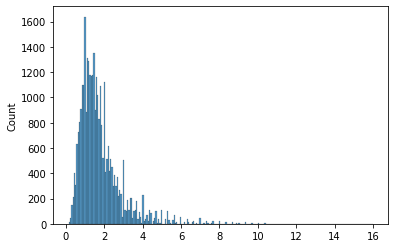

In [8]:
ratio = []
for unique, problem in zip(uq_symb, d.values()):
    ratio += [len(unique) / len(problem)]
    
print(f"Average ratio: {np.average(ratio):.2f}")
sns.histplot(ratio)

# Top axioms

In [9]:
%time
all_symbols = []
for problem in d.values():
    for f in problem:
        all_symbols.extend(f)
count = Counter(all_symbols)
del all_symbols

CPU times: user 1e+03 ns, sys: 1 µs, total: 2 µs
Wall time: 3.58 µs


In [10]:
n = 15
print(f"Top {n} most used symbols:")
count.most_common(n)

Top 15 most used symbols:


[(b'm1_subset_1', 279441),
 (b'u1_struct_0', 157352),
 (b'k1_zfmisc_1', 156133),
 (b'v1_funct_1', 124091),
 (b'v2_struct_0', 121346),
 (b'k2_zfmisc_1', 93209),
 (b'v1_xboole_0', 90591),
 (b'r2_hidden', 82217),
 (b'v1_relat_1', 65675),
 (b'v1_funct_2', 58464),
 (b'r1_xxreal_0', 47712),
 (b'v7_ordinal1', 42319),
 (b'r1_tarski', 38252),
 (b'v4_rlvect_1', 37801),
 (b'v3_rlvect_1', 37693)]

## How many clauses share at least one symbol with the conjecture?



CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 3.34 µs
Average conjecture symbol occurence ratio: 0.88


<AxesSubplot:ylabel='Count'>

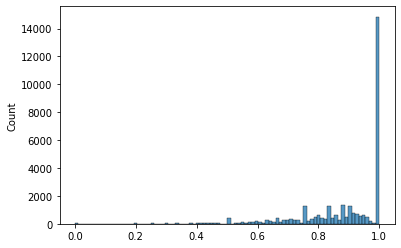

In [11]:
%time
frac = []
for problem in d.values():
    conj = problem[0]
    match = [1 for f in problem[1:] if len(conj.intersection(f)) > 0]
    frac += [len(match) / (len(problem) - 1)]

print(f"Average conjecture symbol occurence ratio: {np.average(frac):.2f}")
sns.histplot(frac)